In [264]:
import numpy as np
import math as mp
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
gamma = 1
eta = 2
sigma = 5
beta_hh = 0.99
r = 0.01
beta = 1 /( 1.0 +r)
beta1 =1/( (1.0 +r* np.exp(30/(36.5*0.9)))) 
W = 1
power = (1+eta)/(-gamma-eta)
mu = 0.1

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_91494/2291322681.py:6: RuntimeWarning: divide by zero encountered in log
  N = -(data_tau) - 1/np.log(beta*c)
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_91494/2291322681.py:7: RuntimeWarning: divide by zero encountered in log
  tau1= -1/np.log(beta*c) - N
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_91494/2291322681.py:9: RuntimeWarning: divide by zero encountered in log
  tau2= -1/np.log(beta1*c) - N


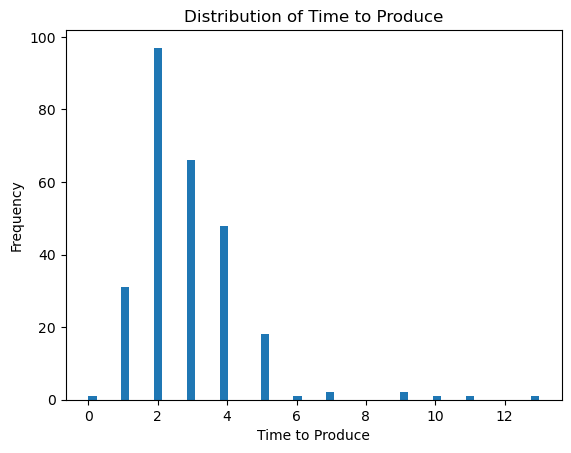

In [266]:
data=pd.read_csv('APP_data_usa_goods.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
data_tau=(data['invtCogsRatio']* 36.5/(30*0.1))
tau_diff = np.zeros(( 1000,1))
i = 0
for c in np.linspace(0, 0.99, 1000): 
    N = -(data_tau) - 1/np.log(beta*c) 
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0     
    tau2= -1/np.log(beta1*c) - N
    tau2[tau2<0] = 0    
    tau_diff[i] = np.mean(np.abs(tau1-tau2))
    i = i+1

min_val = np.min(np.abs(tau_diff-1))
argmins = np.where(np.abs(tau_diff-1) == min_val)[0]
argmins
c_list = np.linspace(0, 0.99, 1000)
c=c_list[argmins]
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0  
tprod = (beta*c)**tau * (tau + N)
plt.hist(tau, bins = 55, alpha=1, label='tau_noise')
plt.xlabel('Time to Produce')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Produce')
plt.show()
tau = np.array(tau, dtype=int)

In [267]:

def consumption_function(P, theta):
    return (P)**power * theta**(1/(gamma+eta))
def euler_equation(P_0, P_1, theta_0, theta_1, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1, theta_1) / consumption_function(P_0, theta_0))**((gamma))
    price_growth_comp = (P_0 / P_1)* (theta_1/theta_0)
    wage_inflation = 1/(consumption_growth_comp / (price_growth_comp *  (beta_hh *   (1+r)) ))
    return wage_inflation
def price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1,theta_1) / consumption_function(P_0, theta_0))**((gamma)) * (theta_1/theta_0)
    constants = (beta_hh * (1+r))
    price_inflation = 1/ (consumption_growth_comp / constants)
    return price_inflation

In [337]:
import numpy as np
import itertools

sequence_length = 4
r_choice = np.linspace(0, 0.015, 7)  # 6 values from 0 to 0.0125 inclusive

# Generate all possible combinations (Cartesian product)
all_combinations = list(itertools.product(r_choice, repeat=sequence_length))

# Convert to NumPy array
big_array = np.array(all_combinations)

print(big_array.shape)  # Should be (6^6, 6) = (46656, 6)

# Assign to r_arrange
r_arrange = big_array
size = r_arrange.shape[0]

(2401, 4)


In [336]:
r_choice

array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 ])

In [269]:
time_length = 20

In [270]:
P = np.zeros((time_length, size))
C = np.zeros((time_length, size))
t_prod = np.zeros((time_length, len(N)))
tau_list = np.zeros((time_length, len(N)))

k=0
beta_org = (1 / (1 + 0.01))*c
tau= -1/np.log(beta_org) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  beta_org**tau_ceil * (tau_ceil + N)
tprod_floor=  beta_org**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0 
tprod1=  np.array(beta_org**tau * (tau + N) )  
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma)) 
tau = np.array(tau, dtype=int)

t_prod[0,:] = tprod1
tau_list[0,:] = tau

for w in range(size): 
    beta_list = 1/(1+r_arrange[w]) * c
    if len(beta_list) < max(tau):  
        pad_length = max(tau) - len(beta_list)
        beta_list = np.concatenate([beta_list, np.full(pad_length, beta_org)])        
    P[0,w] = P0
    C[0,w] = P0**power
    # Step 2: Compute beta product per tau
    t_prod = np.zeros((time_length, len(N)))
    tau_list = np.zeros((time_length, len(N)))
    beta_original_list = np.zeros((time_length, len(N)))
    t_prod_original_list = np.zeros((time_length, len(N)))
    tau_list_original_list = np.zeros((time_length, len(N)))
    t_prod_original_list[0, :] = tprod1

    tau_list_original_list[0, :] = tau
    t_prod[0,:] = tprod1
    tau_list[0,:] = tau

    for j in range(1, time_length):
        beta_temp_list = beta_org * np.ones_like(beta_list)  # Initialize with beta_org
        for i in range(len(beta_list) - 1, -1, -1):
            beta_temp_list[i] = beta_list[i]
                # Assume N: shape (T2,), beta_list: shape (T1,) 
        log_beta = np.log(beta_temp_list)  # shape (T1,)
        neg_inv_log_beta = -1.0 / log_beta  # shape (T1,)

        # Broadcast to 2D: (T2, T1)
        tau_temp = neg_inv_log_beta[None, :] - N[:, None]
        tau_temp[tau_temp<0] = 0  
        tau_temp_floor = np.floor(tau_temp)
        tau_temp_ceil = np.ceil(tau_temp)
        tprod_ceil = beta_list**tau_temp_ceil * (tau_temp_ceil + N[:, None])
        tprod_floor = beta_list**tau_temp_floor * (tau_temp_floor + N[:, None])
        tau_temp[(tprod_ceil-tprod_floor)>0] = tau_temp_ceil[(tprod_ceil-tprod_floor)>0]
        tau_temp[(tprod_ceil-tprod_floor)<0] = tau_temp_floor[(tprod_ceil-tprod_floor)<0]
        # Now compute beta_prod via cumulative product
        cumprod_beta = np.concatenate([[1.0], np.cumprod(beta_temp_list)])  # length t+1
        tau_idx = np.clip(tau_temp.astype(int), 0, len(beta_temp_list))     # shape (n x t)
        beta_prod_matrix = cumprod_beta[tau_idx]                       # shape (n x t)

        # Final tprod using tau_temp and beta_prod
        tprod_temp = beta_prod_matrix * (tau_temp + N[:, None])
        
        tprod_max = np.max(tprod_temp, axis=1)
        col_idx = np.argmax(tprod_temp, axis=1)  # which beta index gave the max tprod
        tau_selected = tau_temp[np.arange(tprod_temp.shape[0]), col_idx]  # shape (n,)
        t_prod_original_list[j, :] = tprod_max
        tau_list_original_list[j, :] = tau_selected.astype(int)

        log_beta = np.log(beta_list)  # shape (T1,)
        neg_inv_log_beta = -1.0 / log_beta  # shape (T1,)

        # Broadcast to 2D: (T2, T1)
        tau_temp = neg_inv_log_beta[None, :] - N[:, None]
        tau_temp[tau_temp<0] = 0  
        tau_temp_floor = np.floor(tau_temp)
        tau_temp_ceil = np.ceil(tau_temp)
        tprod_ceil = beta_list**tau_temp_ceil * (tau_temp_ceil + N[:, None])
        tprod_floor = beta_list**tau_temp_floor * (tau_temp_floor + N[:, None])
        tau_temp[(tprod_ceil-tprod_floor)>0] = tau_temp_ceil[(tprod_ceil-tprod_floor)>0]
        tau_temp[(tprod_ceil-tprod_floor)<0] = tau_temp_floor[(tprod_ceil-tprod_floor)<0]
        # Now compute beta_prod via cumulative product
        cumprod_beta = np.concatenate([[1.0], np.cumprod(beta_list)])  # length t+1
        tau_idx = np.clip(tau_temp.astype(int), 0, len(beta_list))     # shape (n x t)
        beta_prod_matrix = cumprod_beta[tau_idx]                       # shape (n x t)

        # Final tprod using tau_temp and beta_prod
        tprod_temp = beta_prod_matrix * (tau_temp + N[:, None])
        
        tprod_max = np.max(tprod_temp, axis=1)
        col_idx = np.argmax(tprod_temp, axis=1)  # which beta index gave the max tprod
        tau_selected = tau_temp[np.arange(tprod_temp.shape[0]), col_idx]  # shape (n,)

        tau_list_temp = np.zeros_like(tau_list)
        t_prod[j,:] = tprod_max
        tau_list[j,:] = tau_selected.astype(int)
        beta_list = np.concatenate([beta_list[1:], np.array(beta_org)])

    for j in range(1, time_length ):
        t_prod_actual = t_prod_original_list[j,:]
        for i in range(j):
            if tau_list[j,i] < j:
                t_prod_actual[i] = t_prod[j,i]
            if tau_list[j,i] >=j and tau_list_original_list[j,i] < j:
                t_prod_actual[i] = 0

        P1 = (np.sum(1/(t_prod_actual)**(1-sigma)))**(1/(1-sigma)) 

        C[j,w] = P1**power
        P[j,w] = P1



/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_91494/3491533080.py:52: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tau_temp = neg_inv_log_beta[None, :] - N[:, None]
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_91494/3491533080.py:56: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tprod_ceil = beta_list**tau_temp_ceil * (tau_temp_ceil + N[:, None])
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_91494/3491533080.py:57: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tprod_floor = beta_list**tau_temp_floor * (tau_temp_floor + N[:, None])
/var/fol

In [328]:
k=0
deviation_gap = np.zeros((size, 1))
C_consumption = np.zeros((size, time_length)) 
for r in r_arrange: 
    C_temp = C[:,k]
    C_temp_no_zeros = C_temp[C_temp != 0]
    
    Y = np.zeros((len(C_temp_no_zeros), 1))
    theta_list = np.ones_like(C_temp_no_zeros)
    rho = 0           # Persistence of mean reversion
    theta_list = np.zeros(len(C_temp_no_zeros))

    theta_list[0] = 1.0             # Initial value
    theta_list[1] = 0.95        # Shock at t = 1

    for t in range(2, len(C_temp_no_zeros)):
        theta_list[t] = rho * theta_list[t - 1] + (1 - rho) * 1.0
    Y[0] = (C_temp_no_zeros[0]) * theta_list[0]**(1/(gamma + eta)) 
    Y[1:,0] = (C_temp_no_zeros[1:]) * theta_list[1:]**(1/(gamma + eta)) 
    Y = Y/Y[-1]
    deviation_gap[k] = np.sum((Y - 1 )**2)  
    C_consumption[k, :len(Y)] = Y.flatten()
    k = k+1

In [329]:
theta_list

array([1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [330]:
argmins_gap = np.where(deviation_gap == np.min(deviation_gap))[0]
argmins_gap

array([106])

In [331]:
target = np.array([0.01]*sequence_length)

matches = np.all(np.isclose(r_arrange, target), axis=1)

In [332]:
r_arrange[argmins_gap]

array([[0.    , 0.005 , 0.0125, 0.01  ]])

In [333]:
C_consumption[matches]

array([[1.        , 0.98304757, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]])

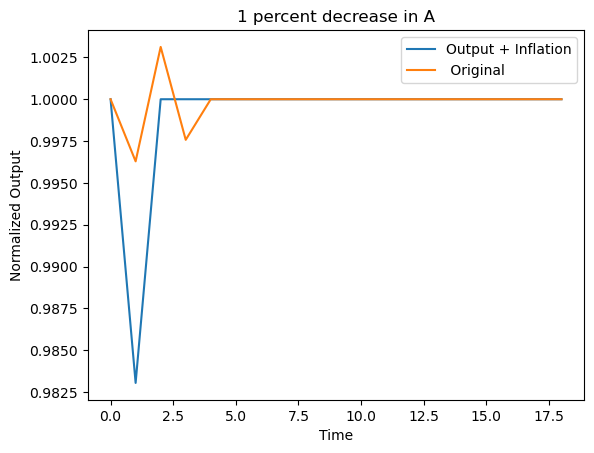

In [334]:


plt.plot(C_consumption[matches,:19].T, label='Output + Inflation')


plt.plot( C_consumption[argmins_gap, :19].T, label='Output')
plt.legend(['Output + Inflation', ' Original'])
plt.title('1 percent decrease in A')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()